Þvermál kúlu mæld með skíðmáli: (53.40+-0.05) mm
Z-ás plastlóðs: (9.20 +-0.05)mm
Z-ás plastlóðs/2: [$Z_L$](4.60 +-0.025)mm
Þvermál plastlóðs: (12.20 +- 0.05)mm
lengd stangar: (93.8 +- 0.05)mm
lengd svarta nabba:[$L_n$] (12.4 +- 0.1)mm
radíus helmholts-spólu[$r_h$] skv. vinnuseðli er: 0.109 m
lóðrétt bil á milli helmholts-spóla er: 0.138 m
fjöldi snúninga í hverri spólu: 195
$R_{k} = {26.70\pm0.025}{mm}$
$x:$ mæld lengd frá efri brún nabba að neðri brún lóðs
$r=R_k+L_n+Z_L+x$
$I[A]$: Straumurinn sem þarf til þess að kúlan byrji að snúast upp á við
Biot-savart: $B_z = \frac{\mu_0I r_h^2}{2(r_h^2 +z^2)^{3/2}}$
þar sem $z=0$(fjarlægð seguls frá miðju beggja spólanna)


In [44]:
mu_0 = 4*np.pi*10**(-7)
r_h = 0.109#m
n_h = 195#fjöldi snúninga
D_I = 0.1#Amper-gæti þurft að endurskoða
D_x = 0.1 #mm - óvissan í x-mælingu er meiri en 0.05mm því hún er svo erfið :o
n = len(x)
R_k = 26.7*10**(-3)#radius kúlu
L_n = 12.4*10**(-3)#lengd priks
Z_L = 4.6*10**(-3)#Lengd nabba
m_L = 1.3588*10**(-3) #Kg
g = 9.823 # skv eih síðu

41.08603981248774 -0.034719100101112135
0.5483956041432776


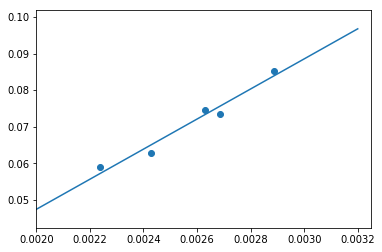

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x_ljott = [9.80,29.80]
I_ljott = [2.00,2.11]
x = np.array([15.20,19.1,29.80,31.00,41.60])*10**(-3)#mælt í mm
I = np.array([1.99,2.16,2.39,2.34,2.57])

r = R_k+L_n+Z_L+x

B= mu_0*I*r_h**2*n_h/(2*(r_h**3))
plt.scatter(B,r)
plt.xlim(0.002,0.00325)
a,b=np.polyfit(B,r,1)
XX = np.linspace(0.002,0.0032,50)
YY = a*XX + b
plt.plot(XX,YY)
print(a,b)

mu = a*(m_L*g)
print(mu)

Núna höldum við ótrauðir áfram í næsta lið, lið 2.
Tökum $n$-fjölda sveifla og fáum þá heildar-sveiflutíma sem $T=t/n$ þar sem $t$ er heildar-mælitími

In [40]:
D_t = 0.5#sec
D_I_2 = 0.1
m_k = 141.5868 * 10**(-3)
inert = 2/5*m_k*R_k**2

0.0036472584978768327 -0.10472982645241345
0.43701714181263474


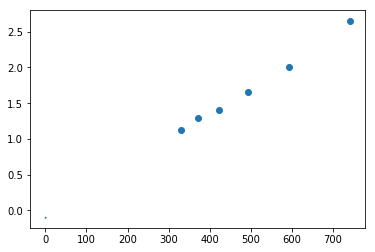

In [41]:
n = np.array([10,10,10,10,10,10]) # fjöldi
t = np.array([16.27,14.19,12.88,11.86,11.35,10.61]) #sec
I_2 = np.array([1.2,1.5,1.8,2.1,2.4,2.7]) #amper

T = t/n
T = T**2
B_2 = mu_0*I_2*r_h**2*n_h/(2*(r_h**3))

plt.scatter(1/B_2,T)
a,b = np.polyfit(1/B_2,T,1)
XX = np.linspace(0.00,1,50)
YY = a*XX + b
plt.plot(XX,YY)
print(a,b)
mu_2 = 4*np.pi**2*inert/(a)
print(mu_2)

Hluti 3, mælum pólveltu með snæri,stróbljósi, viljum vinna við 7Hz(út frá stróblósi). Mælum 1 pólveltu og reiknum út tíðni frá þeirri mælingu

0.3987779308271184


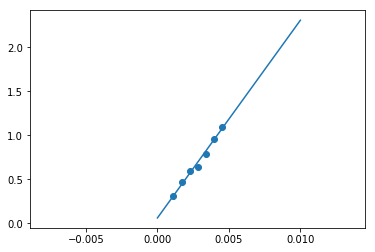

In [69]:
f_s = 7.0#Hz 
w_s = f_s*2*np.pi#Hornhraði kúlunnar vegna spuna-Garðars
I_3 = np.array([1.0, 1.5, 2.0, 2.5, 3.0,3.5,4.0])
t_3 = np.array([20.42, 13.34, 10.57,9.80,7.97,6.58,5.72])#Tími pólveltu [s]
f = 1/t_3
w = 2*np.pi/t_3
L = inert*w_s
B_3 = mu_0*I_3*r_h**2*n_h/(2*(r_h**3))

plt.scatter(B_3,w)
a,b = np.polyfit(B_3,w,1)
XX = np.linspace(0.0,0.01,50)
YY = a*XX + b
plt.plot(XX,YY)
mu_3 = a*L
print(mu_3)



Nú förum gallvaskir í lið 4, með lóðum og látum

In [71]:
M_L4 = 137.9464 * 10**(-3)
sM_b = 0.4755 * 10**(-3)
BM_b = 1.1267 * 10**(-3)

0.4030554178994175


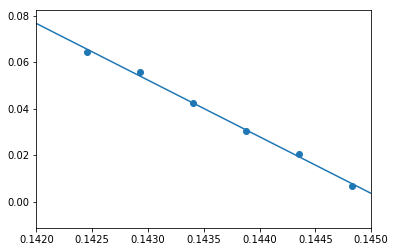

In [87]:
I_4 = np.array([3.8,3.3,2.5,1.8,1.2,0.4])#Straumur þar sem guli bolti byrjar að lyftast
n_s = np.array([0,  1,  2,  3,  4,  5])#fjöldi lítilla bolta
n_b = np.array([4,  4,  4,  4,  4,  4])#fjöldi stórra bolta
totalMass = M_L4 + sM_b*n_s + BM_b*n_b
db_dz = 1.69*10**(-2)*I_4
plt.scatter(totalMass,db_dz)
a,b = np.polyfit(totalMass,db_dz,1)
XX = np.linspace(0.1420,0.145,10)
YY = a*XX + b
plt.plot(XX,YY)
plt.xlim(0.1420,0.145)
mu = -g/a
print(mu)